In [1]:
#导入所需软件包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import scipy

In [43]:
#读取预处理过的数据
original_Single = pd.read_excel('./results/销售量按单品-月统计.xlsx')
original_Catagory = pd.read_excel('./results/销售量按分类-月统计.xlsx')

In [57]:
# 选择需要计算相关系数的列
columns = original_Single.columns[1:253]

In [58]:
# 计算相关系数
corr_matrix = original_Single[columns].corr(method='spearman')

In [59]:
# 将相关系数矩阵转换为上三角形矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
upper_triangle = corr_matrix.mask(mask)

In [60]:
# 将上三角形矩阵展平，并按照相关系数大小进行排序
sorted_corr = upper_triangle.unstack().sort_values(ascending=False)

# 创建一个DataFrame对象，包含相关系数和对应的指标
df = pd.DataFrame({'Index 1': sorted_corr.index.get_level_values(0), 
                   'Index 2': sorted_corr.index.get_level_values(1),
                   'Correlation': sorted_corr.values})

# 删除包含NaN值的行
df = df.dropna()

# 导出DataFrame对象为Excel文件
df.to_excel('./results/斯皮尔曼求得各单品相关系数.xlsx', index=False)

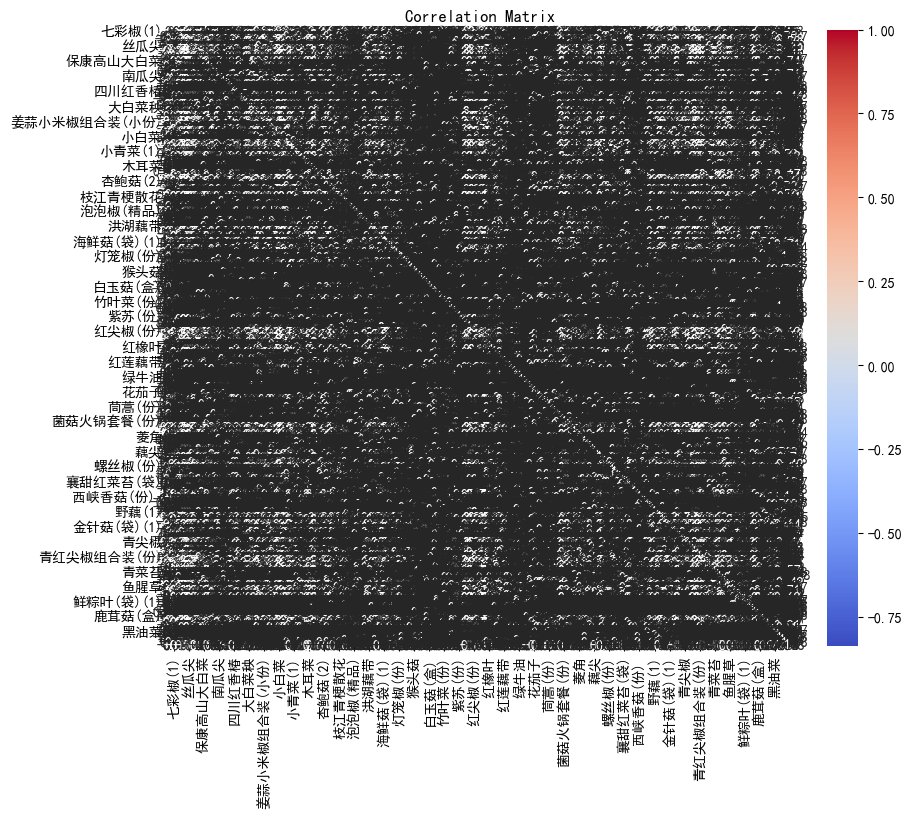

In [61]:
# 绘制相关系数矩阵的热力图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()